# Step 1: Install & Import Libraries

In [1]:
!pip install pandas matplotlib seaborn folium 
# For geospatial visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # For maps
%matplotlib inline

# Step 2: Load the Dataset

In [3]:
df = pd.read_csv(r'C:\Users\zhry6\Downloads\Airbnb_listings.csv')
print("Data shape", df.shape)
df.head() # Inspect first 5 rows

Data shape (424, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,621960198566758900,https://www.airbnb.com/rooms/621960198566758900,20250302010353,2025-03-02,city scrape,The Historic Jesse Buel Farmhouse w/ Heated Pool,4800ft of living space and an epic backyard ma...,"Walkable, Safe and quiet",https://a0.muscache.com/pictures/dd1a2e33-d50b...,382970529,...,5.00,4.87,5.00,NaN,f,12,2,10,0,0.47
1,932642358896439621,https://www.airbnb.com/rooms/932642358896439621,20250302010353,2025-03-02,city scrape,Stylish top floor apt w/parking,The whole group will enjoy easy access to ever...,Pine Hills Neighborhood in Albany NY is full o...,https://a0.muscache.com/pictures/prohost-api/H...,232967878,...,4.84,4.65,4.76,NaN,f,23,23,0,0,1.88
2,53567589,https://www.airbnb.com/rooms/53567589,20250302010353,2025-03-02,city scrape,Private Garden Apt in Downtown Albany|Pets All...,Discover Lark Street - A Hip Albany Neighborho...,If you visit Albany’s Capital Region without s...,https://a0.muscache.com/pictures/2e5b6926-a177...,433096110,...,4.96,4.79,4.86,NaN,f,4,4,0,0,6.40
3,20671966,https://www.airbnb.com/rooms/20671966,20250302010353,2025-03-02,city scrape,The Metropolitan,This full apartment is located on the 3rd floo...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,98744672,...,4.98,4.93,4.87,NaN,f,8,2,6,0,0.51
4,24606880,https://www.airbnb.com/rooms/24606880,20250302010353,2025-03-02,city scrape,The Western Suite,"Located in a huge Victorian, this beautiful su...",NaN,https://a0.muscache.com/pictures/e8183a7b-a392...,98744672,...,4.96,4.96,4.88,NaN,f,8,2,6,0,0.62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 79 columns):
id                                              424 non-null int64
listing_url                                     424 non-null object
scrape_id                                       424 non-null int64
last_scraped                                    424 non-null object
source                                          424 non-null object
name                                            424 non-null object
description                                     413 non-null object
neighborhood_overview                           206 non-null object
picture_url                                     424 non-null object
host_id                                         424 non-null int64
host_url                                        424 non-null object
host_name                                       423 non-null object
host_since                                      423 non-null object
host_location 

# Step 3: Data Cleaning

## Check Missing Values

In [5]:
# Check missing values per column
missing = df.isnull().sum().sort_values(ascending=False)
# df.isnull() → returns a DataFrame of True/False where each True is a missing (null) value.

#.sum() → adds up the True values for each column (True = 1, False = 0), giving total missing values per column.

#.sort_values(ascending=False) → sorts columns by most missing values at the top.

missing_percent = (missing / len(df)) * 100
# len(df) is the total number of rows.

pd.concat([missing, missing_percent], axis=1, keys = ['Missing Count', 'Missing %'])
# Combines the missing and missing_percent Series side by side into one DataFrame.

# axis=1 → concatenate along columns (i.e. horizontal merge).

# keys=['Missing Count', 'Missing %'] → names the two columns.

,Missing Count,Missing %
neighbourhood_group_cleansed,424,100.000000
calendar_updated,424,100.000000
license,424,100.000000
neighbourhood,218,51.415094
neighborhood_overview,218,51.415094
...,...,...
calculated_host_listings_count_shared_rooms,0,0.000000
bathrooms_text,0,0.000000
accommodates,0,0.000000
room_type,0,0.000000


In [6]:
df['neighbourhood'].head(10)

0    Neighborhood highlights
1    Neighborhood highlights
2    Neighborhood highlights
3                        NaN
4                        NaN
5                        NaN
6    Neighborhood highlights
7    Neighborhood highlights
8    Neighborhood highlights
9                        NaN
Name: neighbourhood, dtype: object

In [7]:
df['neighbourhood'].describe()

count                         206
unique                          1
top       Neighborhood highlights
freq                          206
Name: neighbourhood, dtype: object

In [8]:
df['neighbourhood'].unique

<bound method Series.unique of 0      Neighborhood highlights
1      Neighborhood highlights
2      Neighborhood highlights
3                          NaN
4                          NaN
                ...           
419                        NaN
420                        NaN
421                        NaN
422    Neighborhood highlights
423    Neighborhood highlights
Name: neighbourhood, Length: 424, dtype: object>

In [9]:
missing_summary = pd.concat([missing, missing_percent], axis=1, keys=['Missing Count', 'Missing %'])
# Save the result to a variable
# If 'missing_summary = pd.concat', missing_summary is actually referring to the function pd.concat itself, not the result of the concatenation. 
missing_summary.head(15)

,Missing Count,Missing %
neighbourhood_group_cleansed,424,100.000000
calendar_updated,424,100.000000
license,424,100.000000
neighbourhood,218,51.415094
neighborhood_overview,218,51.415094
host_about,194,45.754717
host_location,91,21.462264
host_neighbourhood,67,15.801887
review_scores_accuracy,58,13.679245
first_review,58,13.679245


In [10]:
df['host_about'].unique

<bound method Series.unique of 0      Airbnb has transformed every part of my life f...
1                                                    NaN
2                                                    NaN
3      My name is Bela Schuch, I am manager of The In...
4      My name is Bela Schuch, I am manager of The In...
                             ...                        
419                                                  NaN
420                                                  NaN
421                                                  NaN
422    I am an architect, often traveling with my fam...
423    I was born in Poland but grew up in NY and now...
Name: host_about, Length: 424, dtype: object>

In [11]:
df['review_scores_accuracy'].unique

<bound method Series.unique of 0      5.00
1      4.84
2      4.90
3      4.91
4      4.96
       ... 
419     NaN
420     NaN
421     NaN
422    5.00
423    5.00
Name: review_scores_accuracy, Length: 424, dtype: float64>

In [12]:
df['first_review'].unique

<bound method Series.unique of 0      2022-07-17
1      2023-07-23
2      2021-12-13
3      2017-09-11
4      2018-10-13
          ...    
419           NaN
420           NaN
421           NaN
422    2023-04-14
423    2017-12-25
Name: first_review, Length: 424, dtype: object>

In [13]:
df['review_scores_value'].unique

<bound method Series.unique of 0      5.00
1      4.76
2      4.86
3      4.87
4      4.88
       ... 
419     NaN
420     NaN
421     NaN
422    4.96
423    4.88
Name: review_scores_value, Length: 424, dtype: float64>

## Handle Missing Data

In [14]:
# Drop columns with >50% missing values or impute
# Drop caolumns with high missingness
df.drop(columns=['neighbourhood_group_cleansed', 'calendar_updated', 'license'], inplace=True, errors='ignore')

# Fill numerical missing values with median
df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].median(), inplace=True)

# Drop rows with missing 'review_scores_value' (critical for analysis)
df.dropna(subset=['review_scores_value'], inplace=True)

## Remove Duplicates

In [15]:
df.drop_duplicates(inplace=True)

# Step 4: Univariate Analysis

## Price Distribution

In [17]:
conda update seaborn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [29]:
# Step 1: Convert all values to string
# Step 2: Replace blanks with NaN
# Step 3: Remove $ and , from strings
# Step 4: Convert to float
df['price'] = (
    df['price']
    .astype(str)
    .replace('', np.nan)  # Treat blank strings as missing
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
)

# Final conversion to numeric (float), coercing errors
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [32]:
print(df['price'].dtype)         # Should be float64
print(df['price'].isnull().sum())  # Count of missing/blank/invalid prices
print(df['price'].describe())    # See price stats: min, median, etc.

float64
42
count    324.000000
mean     109.302469
std       88.899330
min       32.000000
25%       68.000000
50%       93.000000
75%      120.250000
max      882.000000
Name: price, dtype: float64


In [33]:
# Step 1: Calculate the median
price_median = df['price'].median()

# Step 2: Fill NaN (missing/blank) with the median
df['price'].fillna(price_median, inplace=True)


In [35]:
print(df['price'].dtype)         # Should be float64
print(df['price'].isnull().sum())  # Count of missing/blank/invalid prices
print(df['price'].describe())    # See price stats: min, median, etc.

float64
0
count    366.000000
mean     107.431694
std       83.790015
min       32.000000
25%       71.000000
50%       93.000000
75%      114.000000
max      882.000000
Name: price, dtype: float64


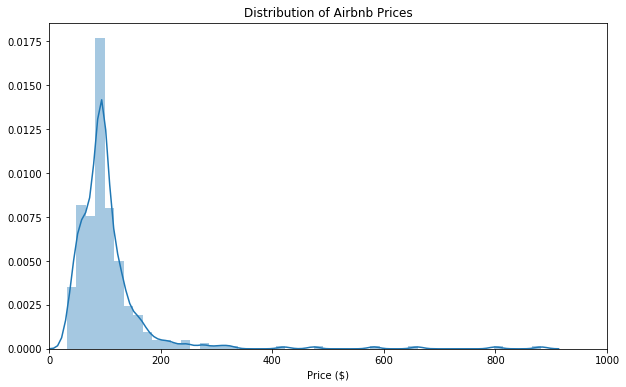

In [39]:
# Plot price distribution
plt.figure(figsize=(10, 6))
sns.distplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price ($)')
plt.xlim(0, 1000)  # Remove extreme outliers for better visualization
plt.show()
# sns.histplot() exists in Seaborn 0.11.0. Curently this is on Seaborn 0.9.0. So use sns.displot() to get the distribution. 

## Room Type Distribution

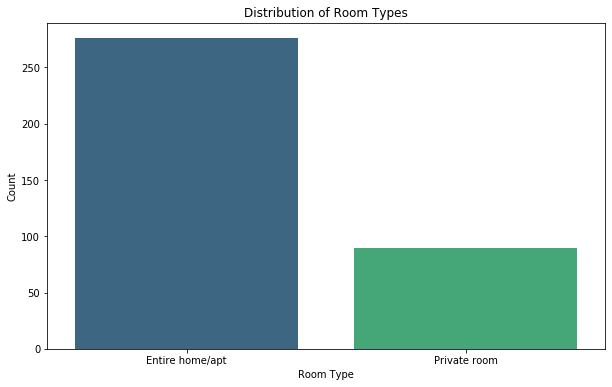

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type', palette='viridis')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

# Step 5: Bivariate Analysis

## Price vs. Room Type

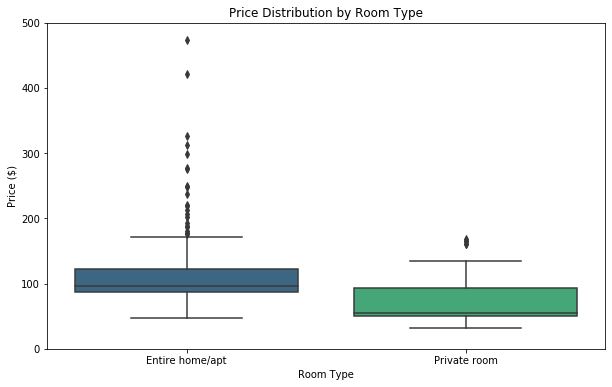

In [41]:
plt.figure(figsize=(10, 6))  #Creates a new plot with a figure size of 10x6 inches.
sns.boxplot(data=df, x='room_type', y='price', palette='viridis')
plt.ylim(0, 500)  # Exclude extreme outliers. Sets the y-axis limits from 0 to 500, which helps exclude extreme outliers (like super high-priced listings) so the chart is easier to read.
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

How to read the boxplot:
Each box represents:
The middle 50% of listings (the interquartile range, or IQR, from 25th to 75th percentile.)
Line inside the box = median price (middle value)
Whiskers extend to typical min/max values (within 1.5×IQR)
Dots above whiskers = outliers

This boxplot compares the distribution of Airbnb prices between two room types: Entire home/apt and Private room. 
For the entire home/apt: 

1 Median price: around 100 dollars.

2 Most listings fall between 80 and 130 dollars. 

3 Many outliers: Some listings go well above 200 dollars, even close to 500 dollars.

4 This category is more expensive, and has a wider spread of prices.


For the private room: 

1 Median price: closer to 70 dollars.

2 Most listings range between 50 and 100 dollars. 

3 Fewer outliers, but still some going above 150 dollars. 

4 Overall cheaper and more consistent in pricing than entire homes. 

In summary: 
* Entire homes cost more, but the prices vary a lot more. 
* Private rooms are cheaper, and more consistent in pricing. 
* If modeling or predicting price, room type clearly matters. 
* Outliers (especially for entire homes) could skew mean-based metrics — so median is often a better central measure here. 

## Top 20 Neighbourhood by Average Price

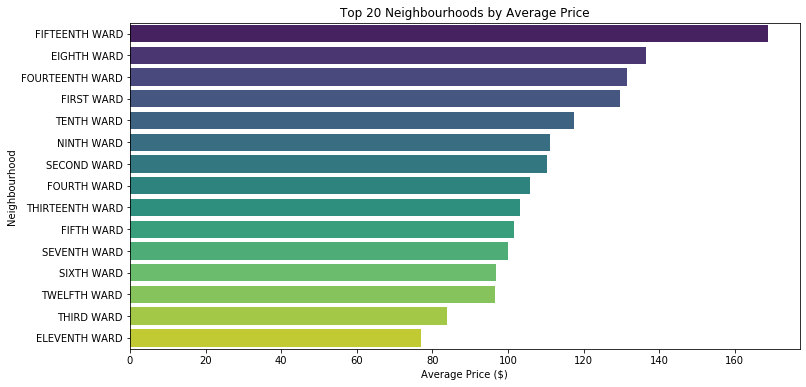

In [49]:
neighbourhood_prices = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=neighbourhood_prices.values, y=neighbourhood_prices.index, palette='viridis')
plt.title('Top 20 Neighbourhoods by Average Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighbourhood')
plt.show()

# Step 6: Correlation Analysis

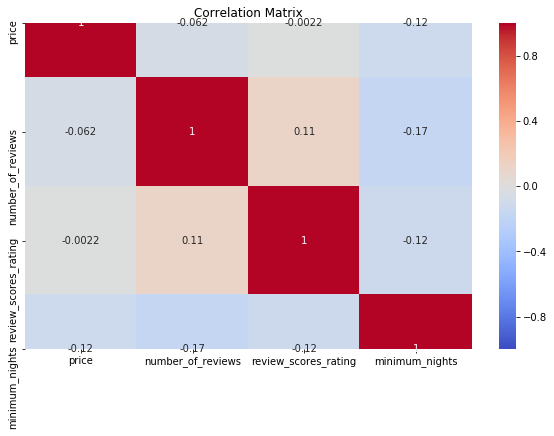

In [44]:
# Select numerical columns
numerical_cols = ['price', 'number_of_reviews', 'review_scores_rating', 'minimum_nights']
corr_matrix = df[numerical_cols].corr()

# Then .corr() computes the correlation matrix — which shows how strongly related each pair of columns is.
# The values range from -1 to 1:
# 1 = perfect positive correlation
# 0 = no correlation
# -1 = perfect negative correlation

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 
# sns.heatmap() creates a colored grid showing the correlations.
# annot=True shows the correlation values in the cells.
# cmap='coolwarm' gives a red-to-blue gradient:
# Red = negative correlation
# Blue = positive correlation
# vmin=-1, vmax=1 sets the color scale range from -1 to 1.

plt.title('Correlation Matrix')
plt.show()

review_scores_rating and number_of_reviews have a weak positive correlation (0.11): better-rated listings tend to get more reviews.
price and number_of_reviews, price and review_scores_rating might be almost uncorrelated (-0.062 and -0.0022): they don't move together much. 
price and minimum_nights have a weak negative correlation (-0.12): higher prices tend to have fewer minimum nights required. 
This analysis helps identify relationships in the data that might:
* Affect pricing
* Influence user ratings
* Drive bookings or reviews. 
It also helps decide what features to include when building predictive models or doing deeper analysis.

In [45]:
from scipy.stats import pearsonr

# Drop rows where either value is missing
subset = df[['price', 'number_of_reviews']].dropna()

# Get correlation and p-value
corr, p_value = pearsonr(subset['price'], subset['number_of_reviews'])

print(f"Pearson correlation: {corr:.3f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation: -0.062
P-value: 0.2391


corr: strength and direction of the linear relationship
p_value: significance of that relationship

If p < 0.05 → the correlation is statistically significant
If p ≥ 0.05 → the correlation might be due to random chance

There’s no correlation between price and number of reviews
And it's not statistically significant (p > 0.05). 

# Step 7 Geospatial Analysis

In [46]:
# Create a map centered on the city's average coordinates
map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Add markers for listings
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='blue' if row['price'] < 100 else 'red',
        fill=True,
        tooltip=f"Price: ${row['price']} | Type: {row['room_type']}"
    ).add_to(map)

map  # Display the map (works in Jupyter Notebook)

# Step 8: Time Series Analysis

C:\Users\zhry6\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


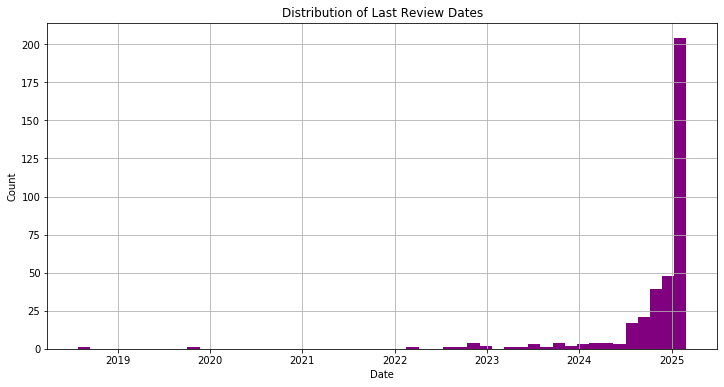

In [47]:
# Convert to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Plot reviews over time
plt.figure(figsize=(12, 6))
df['last_review'].hist(bins=50, color='purple')
plt.title('Distribution of Last Review Dates')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

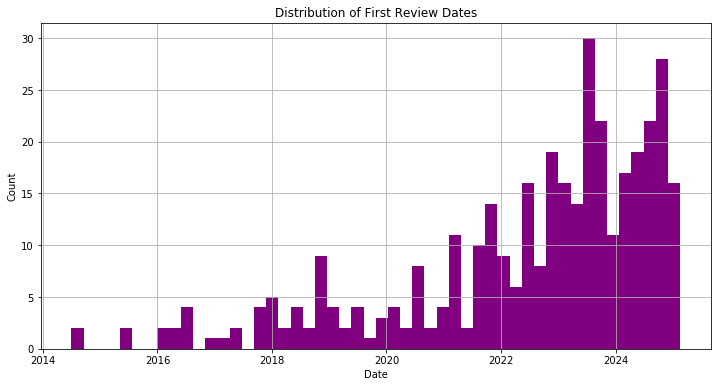

In [48]:
# Convert to datetime
df['first_review'] = pd.to_datetime(df['first_review'])

# Plot reviews over time
plt.figure(figsize=(12, 6))
df['first_review'].hist(bins=50, color='purple')
plt.title('Distribution of First Review Dates')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# Step 9: Comparative Group Analysis

In [50]:
# Prepare data
# Ensure 'number_of_reviews' and 'review_scores_rating' are clean
df = df.dropna(subset=['review_scores_rating', 'number_of_reviews'])

# Convert 'number_of_reviews' to integer
df['number_of_reviews'] = df['number_of_reviews'].astype(int)

In [51]:
# Create groups
# Create a binary flag for listings with >50 reviews
df['high_reviews'] = df['number_of_reviews'] > 50

# Group data and calculate average ratings
grouped = df.groupby('high_reviews')['review_scores_rating'].mean().reset_index()
print(grouped)

   high_reviews  review_scores_rating
0         False              4.722553
1          True              4.842366


In [52]:
# Calculate percentage difference
mean_low = grouped.loc[grouped['high_reviews'] == False, 'review_scores_rating'].values[0]
mean_high = grouped.loc[grouped['high_reviews'] == True, 'review_scores_rating'].values[0]

percentage_diff = ((mean_high - mean_low) / mean_low) * 100
print(f"Listings with >50 reviews have a {percentage_diff:.1f}% higher average rating.")

Listings with >50 reviews have a 2.5% higher average rating.


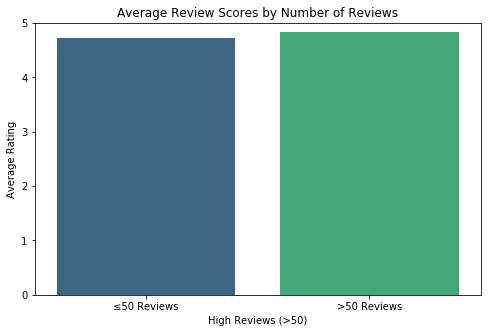

In [53]:
# Visualize the difference
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='high_reviews', y='review_scores_rating', palette='viridis')
plt.title('Average Review Scores by Number of Reviews')
plt.xlabel('High Reviews (>50)')
plt.ylabel('Average Rating')
plt.xticks([0, 1], ['≤50 Reviews', '>50 Reviews'])
plt.ylim(0, 5)  # Ratings typically range from 1-5
plt.show()

In [54]:
# Validate with statistical testing. Perform a t-test to confirm the difference is statistically significant. 
from scipy.stats import ttest_ind

# Split data into two groups
low_reviews = df[df['high_reviews'] == False]['review_scores_rating']
high_reviews = df[df['high_reviews'] == True]['review_scores_rating']

# Run t-test
t_stat, p_value = ttest_ind(high_reviews, low_reviews, equal_var=False)
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

p-value: 0.0001
The difference is statistically significant.


Interpret results: 

Why does this happen? Listings with more reviews may have better service/management (leading to higher ratings) or survivorship bias (poorly rated listings with many reviews get removed).

Actionable insight: Promote listings with >50 reviews to users, as they are more likely to deliver a high-quality experience.

# Step 10: Key Insights Summary

1. Price Insights: 
Enrite home/apartments are more expensive than private rooms. 
The most expensive neighbourhood is Fifteenth Ward with an average price of 170 dollars. 

2. Demand Insights: 
Listings with >50 reviews have a 2.5% higher average rating.

3. Recommendations: 
Target budget travelers by promoting private rooms in Third, Sixth and Twelfth Ward. 